<a id="title_ID"></a>
# JWST Pipeline Validation Notebook: calwebb_coron3 with NIRCam

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam 

### Table of Contents

<div style="text-align: left"> 
    
<br> [Introduction\*](#intro)
<br> [JWST CalWG Algorithm\*](#algorithm)
<br> [Test Description\*](#description)
<br> [Data Description\*](#data_descr)
<br> [Imports\*](#imports)
<br> [Set up Temporary Directory\*](#temp)
<br> [Loading the Data\*](#data_load)
<br> [Run the Pipeline](#pipeline)
<br> [Perform Tests or Visualization](#testing) 
<br> [About This Notebook\*](#about)
<br>    

</div>

<a id="intro"></a>
# Introduction

This notebook validates the stage 3 coronagraphic pipeline (calwebb_coron3).

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_coron3.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/coron

[Top of Page](#title_ID)

<a id="algorithm"></a>
# JWST CalWG Algorithm

The coron3 pipeline consists of the following steps:

1) outlier_detection: identifies bad pixels/outliers in the input images

2) stack_refs: stacks the reference PSFs together into a 3D data cube

3) align_refs: aligns/shifts the stack of reference PSFs to the target PSFs

4) klip: uses the Karhunen-Loeve Image Plane (KLIP) algorithm to fit and subtract an optimal PSF from the target PSFs

5) resample: combines the PSF-subtracted target images into a single product

[Top of Page](#title_ID)

<a id="description"></a>
# Test Description

All steps of the calwebb_coron3 pipeline are run on the simulated input data.

The tests will ensure basic header/data info in the output images is as expected (e.g. image dimensions, number of outliers detected), as well as inspect the quality of the PSF alignments and the PSF-subtracted images.


[Top of Page](#title_ID)

<a id="data_descr"></a>
# Data Description

The NIRCam test data consists of 9 small-grid dithered reference PSFs (2 ints, 10 groups) as well as 1 target PSF (10 ints, 10 groups) with 2 companions. The instrument setup for these exposures is as follows:

DETECTOR = NRCA2

SUBARRAY = SUB640A210R

FILTER = F210M

PUPIL = MASKRND

CORONMSK = MASKA210R

READPATT = RAPID

[Top of Page](#title_ID)

<a id="imports"></a>
# Imports

* astropy.io for opening fits files
* ci_watson.artifactory_helpers to retrieve test data from artifactory
* glob for making file lists
* jwst.pipeline.calwebb_coron3 is the pipeline step being tested
* matplotlib.pyplot to generate plots
* os for file handling
* tempfile to create a temporary processing directory


In [1]:
from astropy.io import fits
from ci_watson.artifactory_helpers import get_bigdata
import glob
from jwst.pipeline.calwebb_coron3 import Coron3Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from tempfile import TemporaryDirectory

[Top of Page](#title_ID)

<a id="temp"></a>
# Set up Temporary Directory


In [2]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory

data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

[Top of Page](#title_ID)

<a id="data_load"></a>
# Loading the Data

In [3]:
# Copy the test files from Artifactory into the temporary directory

files = ['lib_ss20_sgd1_calints.fits', 'lib_ss20_sgd2_calints.fits', 'lib_ss20_sgd3_calints.fits',
         'lib_ss20_sgd4_calints.fits', 'lib_ss20_sgd5_calints.fits', 'lib_ss20_sgd6_calints.fits',
         'lib_ss20_sgd7_calints.fits', 'lib_ss20_sgd8_calints.fits', 'lib_ss20_sgd9_calints.fits',
         'lib_ss20_target_roll1_calints.fits', 'coro_test.asn']
for f in files:
    file = get_bigdata('jwst_validation_notebooks',
                       'validation_data',
                       'calwebb_coron3',
                       'coron3_nircam_test', f)

[Top of Page](#title_ID)

<a id="pipeline"></a>
# Run the Pipeline

In [4]:
# Initialize the coron3 pipeline
m = Coron3Pipeline()
m.save_results = True

# Run the pipeline
m.run('coro_test.asn')

2021-08-27 12:01:37,883 - stpipe.Coron3Pipeline - INFO - Coron3Pipeline instance created.


2021-08-27 12:01:37,885 - stpipe.Coron3Pipeline.stack_refs - INFO - StackRefsStep instance created.


2021-08-27 12:01:37,886 - stpipe.Coron3Pipeline.align_refs - INFO - AlignRefsStep instance created.


2021-08-27 12:01:37,887 - stpipe.Coron3Pipeline.klip - INFO - KlipStep instance created.


2021-08-27 12:01:37,889 - stpipe.Coron3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2021-08-27 12:01:37,890 - stpipe.Coron3Pipeline.resample - INFO - ResampleStep instance created.


2021-08-27 12:01:38,076 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline running with args ('coro_test.asn',).


2021-08-27 12:01:38,080 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'steps': {'stack_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'align_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}, 'klip': {'pre_hooks': [], 'post_hooks': [], 'output_file': No

2021-08-27 12:01:38,081 - stpipe.Coron3Pipeline - INFO - Starting calwebb_coron3 ...


2021-08-27 12:01:38,549 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd1_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:38,931 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:38,934 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:39,099 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd2_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:39,102 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:39,103 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:39,263 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd3_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:39,266 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:39,267 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:39,423 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd4_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:39,426 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:39,427 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:39,584 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd5_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:39,587 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:39,588 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:39,743 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd6_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:39,746 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:39,748 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:39,903 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd7_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:39,905 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:39,907 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:40,063 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd8_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:40,066 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:40,067 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:40,230 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd9_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:40,232 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:40,234 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:40,443 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_target_roll1_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-08-27 12:01:40,446 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-08-27 12:01:40,447 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-08-27 12:01:42,112 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd1_calints.fits>,).


2021-08-27 12:01:42,114 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:42,122 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:42,148 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:42,233 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:42,545 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd1_c1001_crfints.fits


2021-08-27 12:01:42,545 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:42,652 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd2_calints.fits>,).


2021-08-27 12:01:42,653 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:42,662 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:42,682 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:42,762 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:43,059 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd2_c1001_crfints.fits


2021-08-27 12:01:43,059 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:43,165 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd3_calints.fits>,).


2021-08-27 12:01:43,168 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:43,175 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:43,195 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:43,273 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:43,566 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd3_c1001_crfints.fits


2021-08-27 12:01:43,567 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:43,674 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd4_calints.fits>,).


2021-08-27 12:01:43,676 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:43,684 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:43,705 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:43,784 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:44,076 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd4_c1001_crfints.fits


2021-08-27 12:01:44,077 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:44,183 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd5_calints.fits>,).


2021-08-27 12:01:44,185 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:44,193 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:44,212 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:44,291 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:44,586 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd5_c1001_crfints.fits


2021-08-27 12:01:44,587 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:44,692 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd6_calints.fits>,).


2021-08-27 12:01:44,694 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:44,702 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:44,725 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:44,813 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:45,130 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd6_c1001_crfints.fits


2021-08-27 12:01:45,131 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:45,239 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd7_calints.fits>,).


2021-08-27 12:01:45,241 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:45,250 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:45,270 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:45,349 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:45,649 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd7_c1001_crfints.fits


2021-08-27 12:01:45,649 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:45,757 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd8_calints.fits>,).


2021-08-27 12:01:45,759 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:45,767 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:45,787 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:45,866 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:46,161 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd8_c1001_crfints.fits


2021-08-27 12:01:46,162 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:46,268 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd9_calints.fits>,).


2021-08-27 12:01:46,270 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:46,278 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-08-27 12:01:46,297 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:46,375 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-08-27 12:01:46,665 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd9_c1001_crfints.fits


2021-08-27 12:01:46,665 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:46,769 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs running with args (<ModelContainer>,).


2021-08-27 12:01:46,770 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-08-27 12:01:46,797 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 1 to output stack


2021-08-27 12:01:46,802 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 2 to output stack


2021-08-27 12:01:46,807 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 3 to output stack


2021-08-27 12:01:46,811 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 4 to output stack


2021-08-27 12:01:46,816 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 5 to output stack


2021-08-27 12:01:46,821 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 6 to output stack


2021-08-27 12:01:46,826 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 7 to output stack


2021-08-27 12:01:46,830 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 8 to output stack


2021-08-27 12:01:46,835 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 9 to output stack


2021-08-27 12:01:46,881 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs done


2021-08-27 12:01:47,008 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_psfstack.fits


2021-08-27 12:01:47,342 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_calints.fits>,).


2021-08-27 12:01:47,344 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'ivm', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '5.0 4.0', 'scale': '1.2 0.7', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-08-27 12:01:47,354 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 10 inputs


2021-08-27 12:01:47,376 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/resample/resample_utils.py:156: RuntimeWarning: var_rnoise array not available.  Setting drizzle weight map to 1
  warnings.warn("var_rnoise array not available.  Setting drizzle weight map to 1",



2021-08-27 12:01:47,738 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 10 images


2021-08-27 12:01:48,749 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_target_roll1_c1001_crfints.fits


2021-08-27 12:01:48,750 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-08-27 12:01:48,932 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <CubeModel(18, 640, 640) from coro_test_psfstack.fits>).


2021-08-27 12:01:48,934 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}


2021-08-27 12:01:48,971 - stpipe.Coron3Pipeline.align_refs - INFO - Using PSFMASK reference file /grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits


2021-08-27 12:01:49,136 - stpipe.Coron3Pipeline.align_refs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,



2021-08-27 12:01:49,138 - stpipe.Coron3Pipeline.align_refs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)



2021-08-27 12:01:49,138 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,146 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,153 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,161 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,169 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,176 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,184 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,192 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,199 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,206 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,214 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,221 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,228 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,235 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,242 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,250 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,257 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,265 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,271 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,279 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,285 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,292 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,299 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,306 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,313 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,320 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,327 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:01:49,334 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-08-27 12:05:46,355 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs done


2021-08-27 12:05:47,477 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfalign.fits


2021-08-27 12:05:47,607 - stpipe.Coron3Pipeline.klip - INFO - Step klip running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <QuadModel(10, 18, 640, 640) from lib_ss20_target_roll1_c1001_psfalign.fits>).


2021-08-27 12:05:47,608 - stpipe.Coron3Pipeline.klip - INFO - Step klip parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'truncate': 50}


2021-08-27 12:05:47,615 - stpipe.Coron3Pipeline.klip - INFO - KL transform truncation = 50


2021-08-27 12:05:54,524 - stpipe.Coron3Pipeline.klip - INFO - Step klip done


2021-08-27 12:05:54,756 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfsub.fits


2021-08-27 12:05:55,243 - stpipe.Coron3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2021-08-27 12:05:55,245 - stpipe.Coron3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'ivm', 'pixel_scale_ratio': 1.0, 'single': False, 'blendheaders': False, 'allowed_memory': None}


2021-08-27 12:05:55,262 - stpipe.Coron3Pipeline.resample - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits


2021-08-27 12:05:55,424 - stpipe.Coron3Pipeline.resample - INFO - Resampling science data


2021-08-27 12:05:55,721 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:56,239 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:56,802 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:57,332 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:57,894 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:58,434 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:59,042 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:05:59,574 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:00,112 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:00,691 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:00,979 - stpipe.Coron3Pipeline.resample - INFO - Resampling var_rnoise


2021-08-27 12:06:01,351 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:01,863 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:02,422 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:02,941 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:03,477 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:04,016 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:04,556 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:05,073 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:05,580 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:06,128 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:06,511 - stpipe.Coron3Pipeline.resample - INFO - Resampling var_poisson


2021-08-27 12:06:06,810 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:07,307 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:07,814 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:08,323 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:08,827 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:09,403 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:09,914 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:10,448 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:10,960 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:11,503 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:11,906 - stpipe.Coron3Pipeline.resample - INFO - Resampling var_flat


2021-08-27 12:06:12,187 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:12,702 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:13,230 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:13,824 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:14,424 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:14,943 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:15,467 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:15,983 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:16,488 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:16,990 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-08-27 12:06:17,338 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/utils.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indx = np.asarray(np.floor(np.asarray(value) + 0.5), dtype=np.int)



2021-08-27 12:06:17,341 - stpipe.Coron3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  346.825736745 21.254563694 346.825708926 21.260995901 346.818843479 21.260969972 346.818871598 21.254537767


2021-08-27 12:06:17,344 - stpipe.Coron3Pipeline.resample - INFO - Step resample done


2021-08-27 12:06:18,533 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_i2d.fits


2021-08-27 12:06:18,534 - stpipe.Coron3Pipeline - INFO - ...ending calwebb_coron3


2021-08-27 12:06:18,535 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline done


[Top of Page](#title_ID)

<a id="testing"></a>
# Perform Tests

In [5]:
# Make sure the PSF stack/alignment/subtraction images have the expected data dimensions.
# The expected dimensions for the psf stack images are:
# NX x NY x Number of Reference PSF INTS
# The expected dimensions for the psf alignment images are:
# NX x NY x Number of Reference PSF INTS x Number of Target INTS
# The expected dimensions for the psf subtraction images are:
# NX x NY x Number of Target INTS

f_stack = 'coro_test_psfstack.fits'
f_align = 'lib_ss20_target_roll1_c1001_psfalign.fits'
f_sub = 'lib_ss20_target_roll1_c1001_psfsub.fits'
files = [f_stack, f_align, f_sub]
expected_shapes = [(18, 640, 640), (10, 18, 640, 640), (10, 640, 640)]
for f,shape in zip(files, expected_shapes):
    for ext in ['SCI', 'ERR', 'DQ']:
        data = fits.getdata(f, ext)
        if data.shape != shape:
            print('WARNING: unexpected data shape in {} {}: {}'.format(f, ext, data.shape))

In [6]:
# Make sure a reasonable number of outlier pixels are flagged in each exposure (less than 1%)

files = sorted(glob.glob('*crfints.fits'))
for f in files:
    print(os.path.basename(f))
    dq = fits.getdata(f, 'DQ')
    nints, ny, nx = dq.shape
    for integration in range(nints):
        dq_int = dq[integration]
        n_outlier = len(dq_int[dq_int&16!=0])
        print('\tOutlier pixels in Int {}: {} ({:.5f}% of image)'.format(integration+1,
              n_outlier, n_outlier/(ny*nx)*100))

lib_ss20_sgd1_c1001_crfints.fits
	Outlier pixels in Int 1: 2 (0.00049% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd2_c1001_crfints.fits
	Outlier pixels in Int 1: 1 (0.00024% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd3_c1001_crfints.fits
	Outlier pixels in Int 1: 2 (0.00049% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd4_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd5_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd6_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd7_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 3 (0.00073% of image)
lib_ss20_sgd8_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels 

Text(0, 0.5, 'PSF - Mean PSF [MJy/sr]')

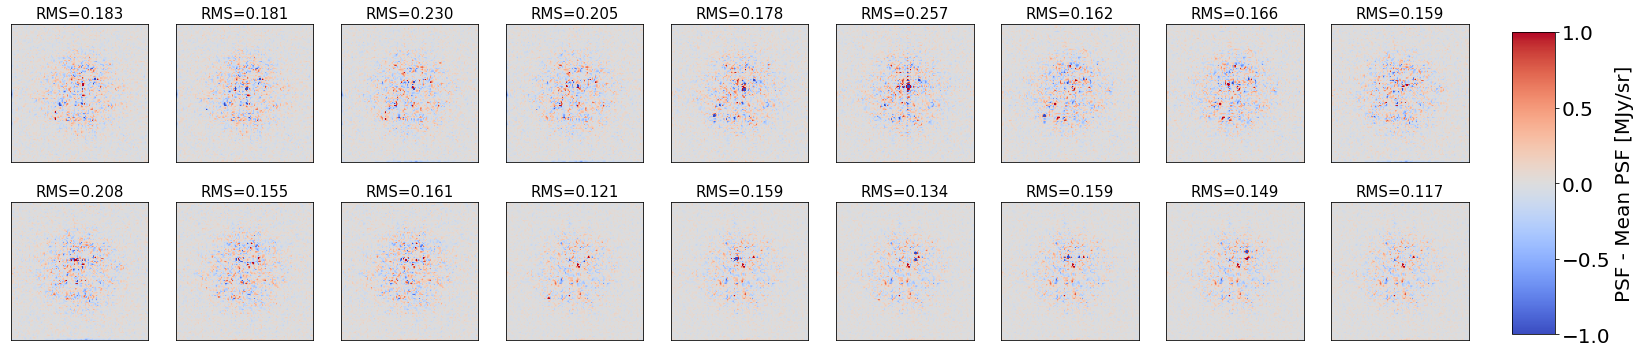

In [7]:
# Make sure the PSFs were aligned properly (i.e. residual alignment RMS should be <0.5 MJr/sr). 
# Each frame represents one PSF-aligned reference integration. There shouldn't be any severe "ringing" 
# effect from outlier pixels (i.e. cross pattern), as these should have been corrected in earlier steps.
# There also shouldn't be any PSF pattern offsets visible in the images, only salt/pepper noise.

fig, axes = plt.subplots(2, 9, figsize=(30,6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_align, 'SCI')
mean = np.mean(data[0], axis=0)
for i, ax in enumerate(axes.flatten()):
    diff = data[0, i] - mean
    diff = diff[y1:y2, x1:x2]
    r = np.sqrt(np.mean(diff**2))
    im = ax.imshow(diff, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title('RMS={:.3f}'.format(r),size=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('PSF - Mean PSF [MJy/sr]', size=20)

Text(0, 0.5, 'Residual PSF [MJy/sr]')

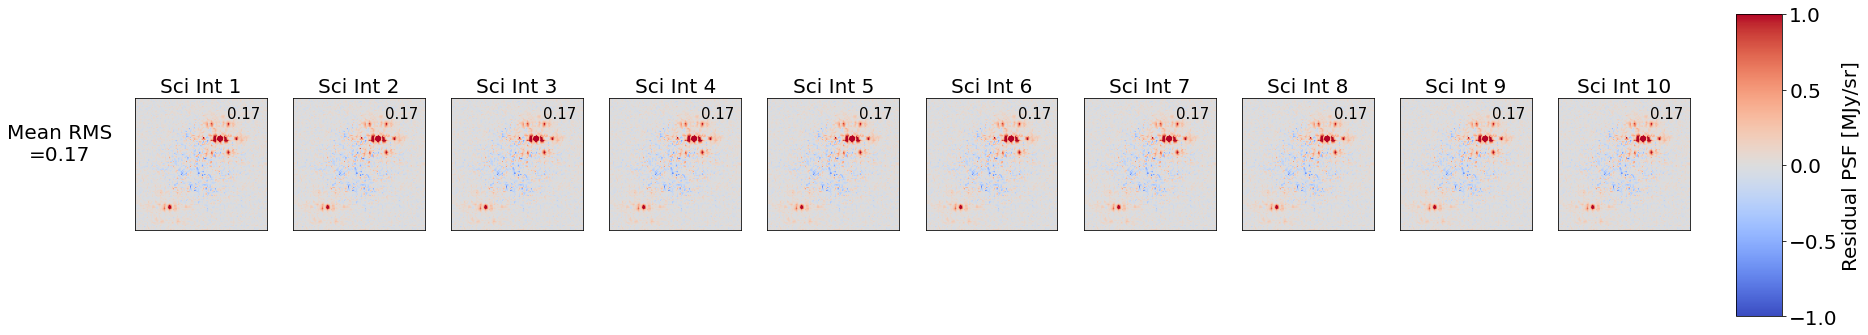

In [8]:
# Make sure the PSF fitting/subtraction worked properly. The 2 companions should be obviously visible
# in red in the top right/bottom left of the image, and the remainder of the image should be ~gray 
# (i.e. residual RMS should be <0.5 MJy/sr).

fig, axes = plt.subplots(1,10, figsize=(32, 6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_sub, 'SCI')
rms = []
for i, ax in enumerate(axes):
    d = data[i, y1:y2, x1:x2]
    r = np.sqrt(np.mean(d**2))
    im = ax.imshow(d, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_title('Sci Int {}'.format(i+1), size=20)
    ax.set_yticks([])
    ax.set_xticks([])
    rms.append(r)
    ax.text(70, 85, '{:.2f}'.format(r), size=15)
axes[0].set_ylabel('Mean RMS\n={:.2f}'.format(np.mean(rms)), size=20, rotation='horizontal', labelpad=75)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('Residual PSF [MJy/sr]', size=20)

Text(0.5, 1.0, 'Residual RMS=0.101')

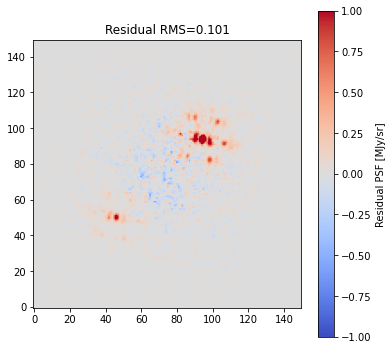

In [9]:
# Make sure the final, combined PSF-subtracted image looks good as well (should just look like 
# a cleaner combination of the above, with residual RMS <0.15)

plt.figure(figsize=(6, 6))
data = fits.getdata('coro_test_i2d.fits', 'SCI')
data = data[300:450, 300:450]
plt.imshow(data, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
plt.colorbar(label='Residual PSF [MJy/sr]')
rms = np.sqrt(np.mean(data**2))
plt.title('Residual RMS={:.3f}'.format(rms))

[Top of Page](#title_ID)

<a id="about"></a>
## About this Notebook
**Author:** Ben Sunnquist, Staff Scientist, NIRCam
<br>**Updated On:** 02/10/2021

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 